In [62]:
data_full="/mnt/lab_data2/anusri/finemo_gpu/output/572M/hits_unique.tsv"
data_250M="/mnt/lab_data2/anusri/finemo_gpu/output/250M/hits_unique.tsv"
data_100M="/mnt/lab_data2/anusri/finemo_gpu/output/100M/hits_unique.tsv"
data_50M="/mnt/lab_data2/anusri/finemo_gpu/output/50M/hits_unique.tsv"
data_25M="/mnt/lab_data2/anusri/finemo_gpu/output/25M/hits_unique.tsv"
data_5M="/mnt/lab_data2/anusri/finemo_gpu/output/5M/hits_unique.tsv"


In [63]:
import pandas as pd
import os
import numpy as np
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt


#MOTIF_HIT_FORMAT=["chr", "start", "end", "start_untrimmed", "end_untrimmed", "motif_name", "hit_coefficient", "hit_coefficient_global", "hit_correlation", "hit_importance", "strand", "peak_name", "peak_id"]
def read_data(data_file):
    annotations = {}
    data = pd.read_csv(data_file, sep="\t", header=0)
    data["motif_name"] = data["motif_name"].replace(["pos_patterns.pattern_10"], ["pos_patterns.pattern_5"])
    data["motif_name"] = data["motif_name"].replace(["pos_patterns.pattern_15"], ["pos_patterns.pattern_5"])
    data["motif_name"] = data["motif_name"].replace(["pos_patterns.pattern_16"], ["pos_patterns.pattern_11"])

#     data["motif_name"] = data["motif_name"].replace(["0_8_REL_MA0101.1"], ["0_9_NFKB1_HUMAN.H11MO.1.B"])
#     data["motif_name"] = data["motif_name"].replace(["0_5_RELB_HUMAN.H11MO.0.C"], ["0_9_NFKB1_HUMAN.H11MO.1.B"])
#     data["motif_name"] = data["motif_name"].replace(["0_14_RUNX1_HUMAN.H11MO.0.A"], ["0_4_RUNX3_HUMAN.H11MO.0.A"])
#     data["motif_name"] = data["motif_name"].replace(["0_21_IRF9_IRF_1"], ["0_0_IRF1_MOUSE.H11MO.0.A"])
#     data["motif_name"] = data["motif_name"].replace(["0_22_SPIB_ETS_1"], ["0_2_SPIB_MOUSE.H11MO.0.A"])
#     data["motif_name"] = data["motif_name"].replace(["0_29_PAX5_MOUSE.H11MO.0.A"], ["0_16_PAX2_PAX_1"])
    return data
    #for idx,row in data.iterrows():
    #    val = row["chr"]+":"+str(row["start"])+":"+str(row["end"])
    #    if row["motif_name"] not in annotations:
    #        annotations[row["motif_name"]] = []
        
    #    if val not in annotations[row["motif_name"]]:
    #        annotations[row["motif_name"]].append(val)
    #return annotations
        



In [64]:
full_hits = read_data(data_full)
hits_250M = read_data(data_250M)
hits_100M = read_data(data_100M)
hits_50M = read_data(data_50M)
hits_25M = read_data(data_25M)
hits_5M = read_data(data_5M)


In [65]:
full_hits

,chr,start,end,start_untrimmed,end_untrimmed,motif_name,hit_coefficient,hit_coefficient_global,hit_correlation,hit_importance,strand,peak_name,peak_id
0,chr10,12651,12655,12640,12670,neg_patterns.pattern_0,1.304802,1.002430e-05,0.924371,0.013438,+,Peak_223866,2967
1,chr10,12670,12674,12659,12689,neg_patterns.pattern_0,0.345015,2.650618e-06,0.900968,0.009173,+,Peak_223866,2967
2,chr10,12757,12761,12746,12776,neg_patterns.pattern_0,2.694981,2.070452e-05,0.817472,0.025687,+,Peak_223866,2967
3,chr10,12777,12781,12762,12792,neg_patterns.pattern_0,1.483526,1.139736e-05,0.815788,0.020377,-,Peak_223866,2967
4,chr10,12784,12795,12775,12805,pos_patterns.pattern_23,1.788427,1.373980e-05,0.827175,0.027710,-,Peak_223866,2967
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145017,chr6,170612617,170612627,170612612,170612642,pos_patterns.pattern_29,7.749504,2.447409e-04,0.870926,0.079270,+,Peak_74854,265867
3145018,chr6,170612667,170612677,170612662,170612692,pos_patterns.pattern_29,0.350116,1.105719e-05,0.861851,0.048723,+,Peak_74854,265867
3145019,chr6,170612667,170612677,170612652,170612682,pos_patterns.pattern_29,1.652346,5.218354e-05,0.863442,0.048723,-,Peak_74854,265867
3145020,chr6,170612677,170612685,170612667,170612697,pos_patterns.pattern_7,1.308438,4.132243e-05,0.774117,0.046524,-,Peak_74854,265867


In [66]:
motif_names = full_hits["motif_name"].unique()

In [89]:
all_datasets = [hits_250M, hits_100M, hits_50M, hits_25M, hits_5M] 
recall_per_motif = {}
total_per_motif = {}

totals = [0,0,0,0,0,0]
for motif in motif_names:
    print(motif)
    if motif.split("_")[0] == "neg":
        continue
        
#     if int(motif.split("_")[2]) > 20:
#         continue
        
    if motif not in recall_per_motif:
        recall_per_motif[motif] = []
  
    if motif not in total_per_motif:
        total_per_motif[motif] = []
        
  
    new_data = full_hits[full_hits["motif_name"]==motif].copy()
    new_data["index"] = new_data["chr"] + ":" + new_data["start"].astype(str) + ":" + new_data["end"].astype(str)
    all_hits = np.unique(new_data["index"])
    totals[0] += all_hits.shape[0]
    #recall_per_motif[motif].append(all_hits.shape[0])

    jdx=1
    for dataset in all_datasets:
        new_data_sub= dataset[dataset["motif_name"]==motif].copy()
        new_data_sub["index"] = new_data_sub["chr"] + ":" + new_data_sub["start"].astype(str) + ":" + new_data_sub["end"].astype(str)
        all_hits_sub = np.unique(new_data_sub["index"])
        totals[jdx] += all_hits_sub.shape[0]
        retrieved = np.intersect1d(all_hits_sub,all_hits).shape[0]
        recall = retrieved/all_hits.shape[0]
        
        #recall = (retrieved-all_hits.shape[0])/all_hits.shape[0]
        #recall=retrieved
        
        #print(retrieved)
        #print(recall)
        recall_per_motif[motif].append(recall)
        total_per_motif[motif].append(all_hits.shape[0])
        jdx = jdx+1
        
        
    
    
    
        

neg_patterns.pattern_0
pos_patterns.pattern_23
pos_patterns.pattern_0
pos_patterns.pattern_3
pos_patterns.pattern_14
pos_patterns.pattern_7
pos_patterns.pattern_54
pos_patterns.pattern_5
pos_patterns.pattern_11
pos_patterns.pattern_4
pos_patterns.pattern_2
pos_patterns.pattern_12
pos_patterns.pattern_6
pos_patterns.pattern_8
pos_patterns.pattern_1
pos_patterns.pattern_22
neg_patterns.pattern_1
pos_patterns.pattern_29
pos_patterns.pattern_25
pos_patterns.pattern_9
pos_patterns.pattern_37
pos_patterns.pattern_32
pos_patterns.pattern_13
pos_patterns.pattern_24
pos_patterns.pattern_26
pos_patterns.pattern_35
pos_patterns.pattern_28
pos_patterns.pattern_27
pos_patterns.pattern_43
pos_patterns.pattern_18
pos_patterns.pattern_52
pos_patterns.pattern_20
pos_patterns.pattern_31
pos_patterns.pattern_41
pos_patterns.pattern_33
pos_patterns.pattern_38
pos_patterns.pattern_19
pos_patterns.pattern_21
pos_patterns.pattern_47
pos_patterns.pattern_30
pos_patterns.pattern_44
pos_patterns.pattern_36
pos_

In [90]:
new_order = sorted(recall_per_motif)
new_order1 = new_order[0:1] + new_order[2:] + new_order[1:2]

In [91]:
new_order1

['pos_patterns.pattern_0',
 'pos_patterns.pattern_11',
 'pos_patterns.pattern_12',
 'pos_patterns.pattern_13',
 'pos_patterns.pattern_14',
 'pos_patterns.pattern_17',
 'pos_patterns.pattern_18',
 'pos_patterns.pattern_19',
 'pos_patterns.pattern_2',
 'pos_patterns.pattern_20',
 'pos_patterns.pattern_21',
 'pos_patterns.pattern_22',
 'pos_patterns.pattern_23',
 'pos_patterns.pattern_24',
 'pos_patterns.pattern_25',
 'pos_patterns.pattern_26',
 'pos_patterns.pattern_27',
 'pos_patterns.pattern_28',
 'pos_patterns.pattern_29',
 'pos_patterns.pattern_3',
 'pos_patterns.pattern_30',
 'pos_patterns.pattern_31',
 'pos_patterns.pattern_32',
 'pos_patterns.pattern_33',
 'pos_patterns.pattern_34',
 'pos_patterns.pattern_35',
 'pos_patterns.pattern_36',
 'pos_patterns.pattern_37',
 'pos_patterns.pattern_38',
 'pos_patterns.pattern_39',
 'pos_patterns.pattern_4',
 'pos_patterns.pattern_40',
 'pos_patterns.pattern_41',
 'pos_patterns.pattern_42',
 'pos_patterns.pattern_43',
 'pos_patterns.pattern_4

([<matplotlib.axis.XTick at 0x7f441f7823d0>,
 [Text(1, 0, '250M'),
  Text(2, 0, '100M'),
  Text(3, 0, '50M'),
  Text(4, 0, '25M'),
  Text(5, 0, '5M')])

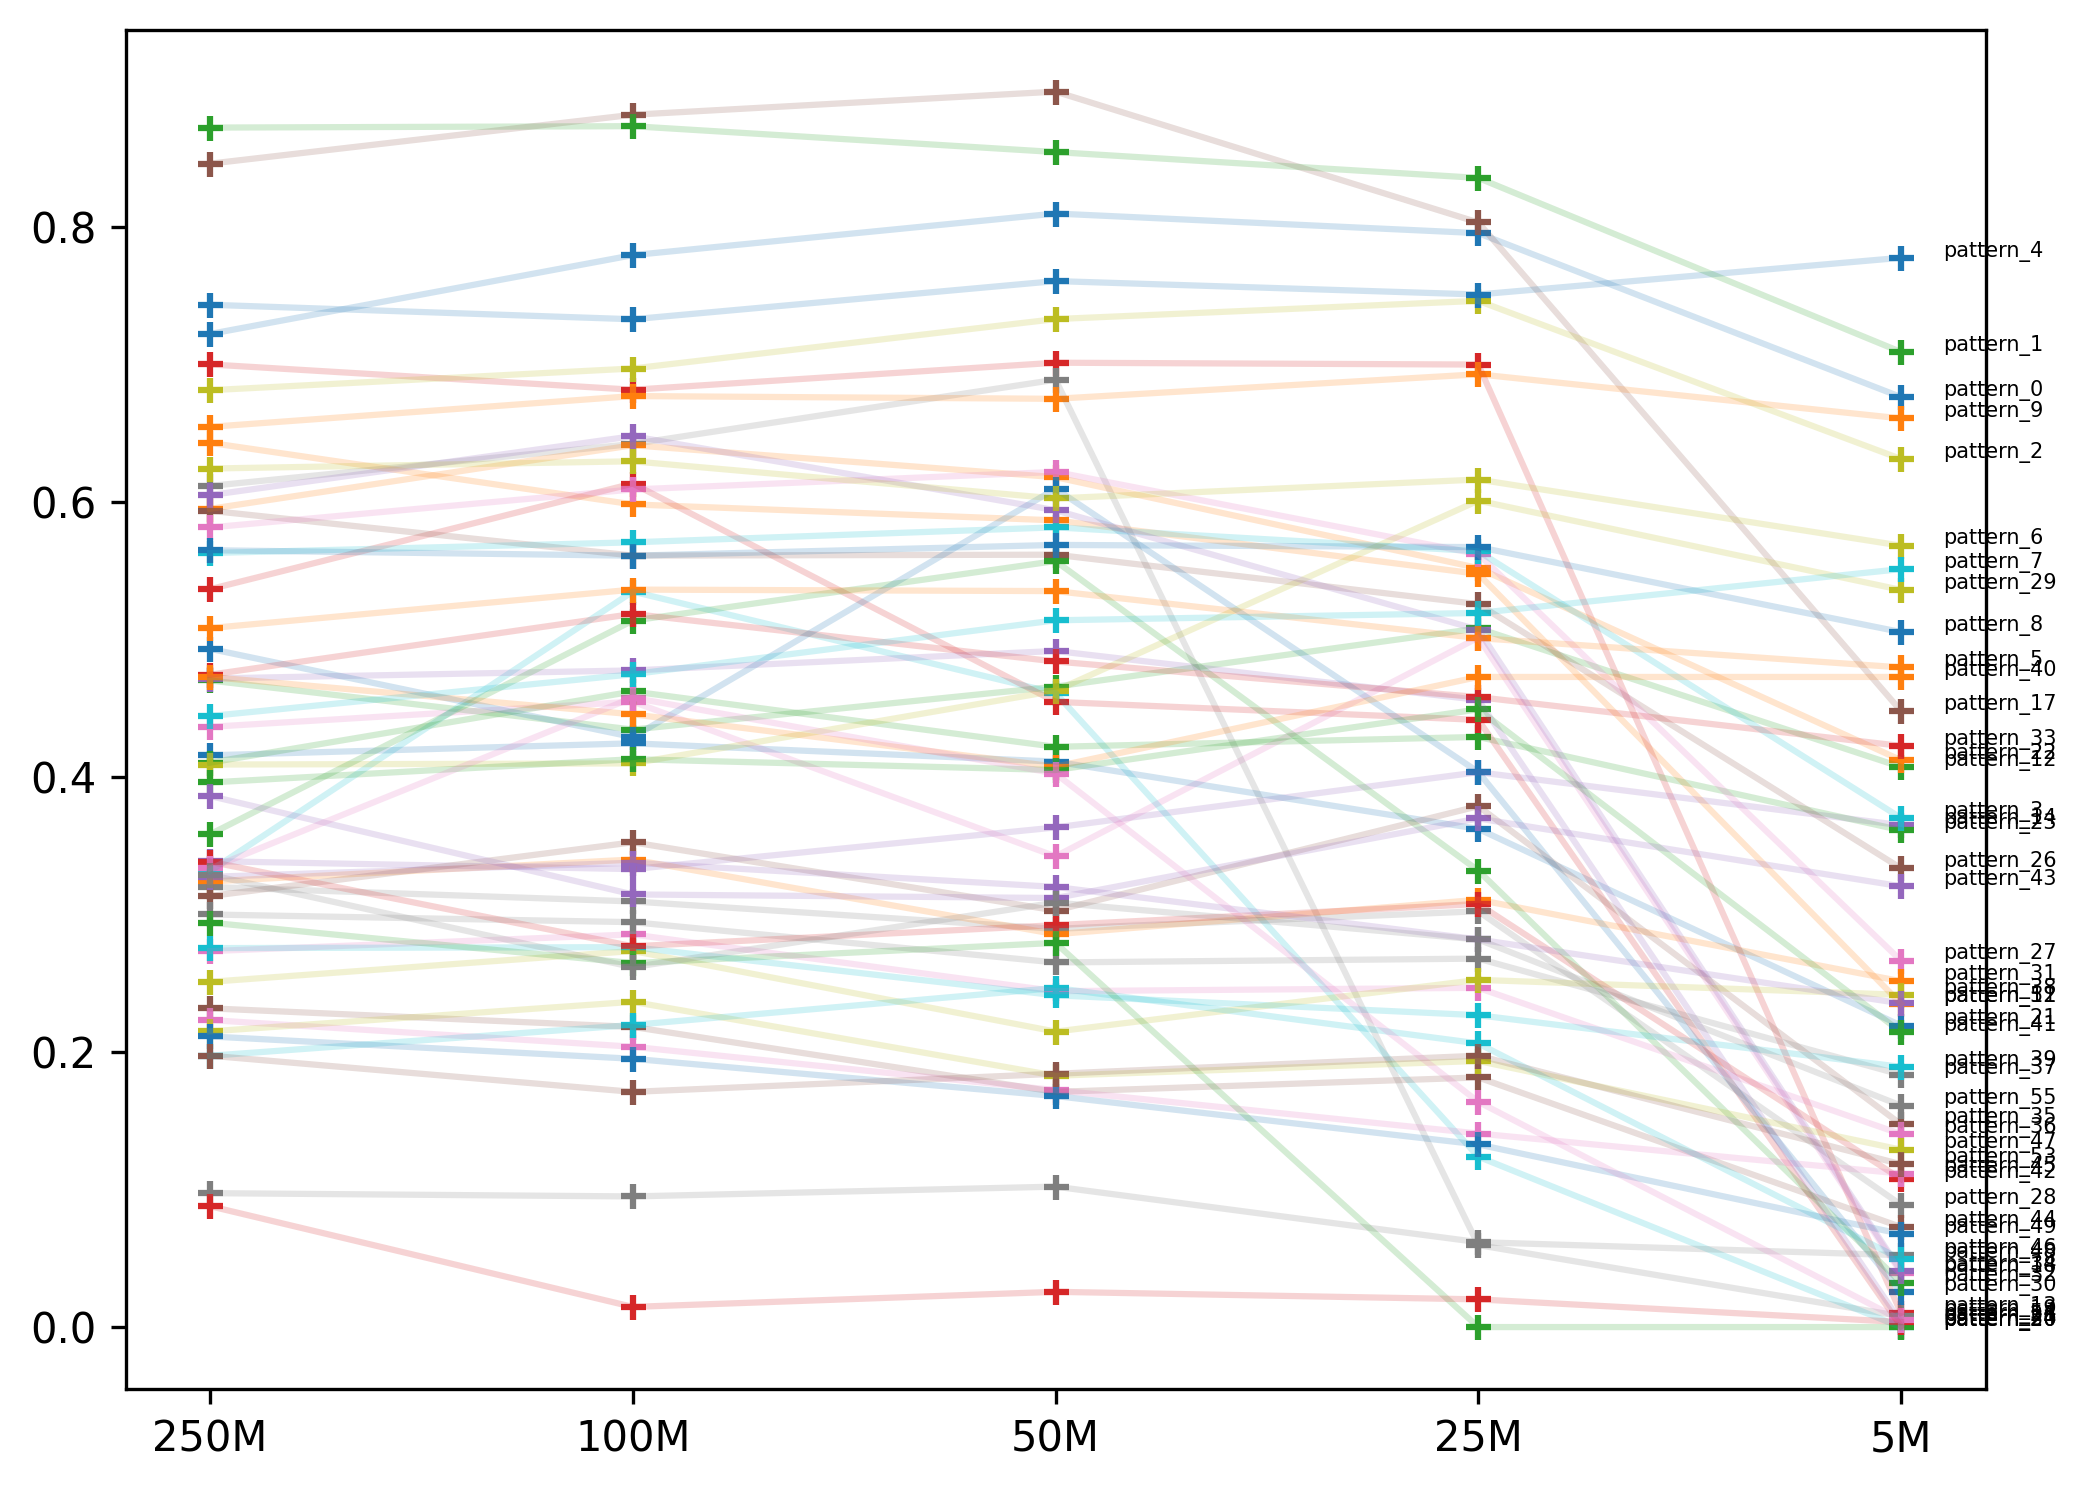

In [92]:

plt.figure(figsize=(8, 6), dpi=300)

for motif in new_order1:
    plt.scatter([1 ,2, 3, 4, 5], recall_per_motif[motif], label=motif, marker="+")
    plt.plot([1 ,2, 3, 4, 5], recall_per_motif[motif],alpha=0.2)
    #print(yaxis_lims)
    plt.text(5.1, recall_per_motif[motif][-1]+0.001, motif.split(".")[-1], fontsize=5)
    
plt.xticks([1 ,2, 3, 4, 5], labels=["250M", "100M" , "50M", "25M", "5M"])

#plt.savefig("subfigs/hitcalling_compare/"+"hitcalling_report_recall.pdf", dpi=300, transparent=True)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [93]:
recall_per_motif[motif]

[0.8723951699189891,
 0.8734141743516585,
 0.8545880674580935,
 0.8357619605645284,
 0.7091761349161869]

In [94]:
motif

'pos_patterns.pattern_1'

In [95]:
total_per_motif

{'pos_patterns.pattern_23': [24739, 24739, 24739, 24739, 24739],
 'pos_patterns.pattern_0': [153836, 153836, 153836, 153836, 153836],
 'pos_patterns.pattern_3': [299944, 299944, 299944, 299944, 299944],
 'pos_patterns.pattern_14': [102158, 102158, 102158, 102158, 102158],
 'pos_patterns.pattern_7': [116528, 116528, 116528, 116528, 116528],
 'pos_patterns.pattern_54': [1160, 1160, 1160, 1160, 1160],
 'pos_patterns.pattern_5': [113807, 113807, 113807, 113807, 113807],
 'pos_patterns.pattern_11': [25090, 25090, 25090, 25090, 25090],
 'pos_patterns.pattern_4': [82446, 82446, 82446, 82446, 82446],
 'pos_patterns.pattern_2': [101892, 101892, 101892, 101892, 101892],
 'pos_patterns.pattern_12': [34562, 34562, 34562, 34562, 34562],
 'pos_patterns.pattern_6': [33404, 33404, 33404, 33404, 33404],
 'pos_patterns.pattern_8': [127869, 127869, 127869, 127869, 127869],
 'pos_patterns.pattern_1': [39254, 39254, 39254, 39254, 39254],
 'pos_patterns.pattern_22': [9896, 9896, 9896, 9896, 9896],
 'pos_pat

In [96]:
recall_per_motif

{'pos_patterns.pattern_23': [0.4105258902946764,
  0.4622660576417802,
  0.42200573992481505,
  0.4292008569465217,
  0.3613323093091879],
 'pos_patterns.pattern_0': [0.7223016719103461,
  0.7796159546530071,
  0.8098819522088457,
  0.7956200109207208,
  0.6763956421123795],
 'pos_patterns.pattern_3': [0.562961752860534,
  0.5707465393540128,
  0.5816385725335396,
  0.564285333262209,
  0.3702491131677913],
 'pos_patterns.pattern_14': [0.3388672448560074,
  0.3330625110123534,
  0.3633685076058654,
  0.4035415728577302,
  0.3650325965661035],
 'pos_patterns.pattern_7': [0.44439104764520115,
  0.4748043388713442,
  0.5140309625154469,
  0.5193601537827818,
  0.5512752299876424],
 'pos_patterns.pattern_54': [0.3336206896551724,
  0.45775862068965517,
  0.4025862068965517,
  0.16379310344827586,
  0.005172413793103448],
 'pos_patterns.pattern_5': [0.5083606456544852,
  0.5363641955240012,
  0.5352746316131697,
  0.5011203177308953,
  0.479768379800891],
 'pos_patterns.pattern_11': [0.6430

In [99]:
lists1 = []
for motif in new_order1:
    temp = [motif.split(".")[-1],250,recall_per_motif[motif][0],total_per_motif[motif][0]]
    lists1.append(temp)
    temp = [motif.split(".")[-1],100,recall_per_motif[motif][1],total_per_motif[motif][1]]
    lists1.append(temp)
    temp = [motif.split(".")[-1],50,recall_per_motif[motif][2],total_per_motif[motif][2]]
    lists1.append(temp)
    temp = [motif.split(".")[-1],25,recall_per_motif[motif][3],total_per_motif[motif][3]]
    lists1.append(temp)
    temp = [motif.split(".")[-1],5,recall_per_motif[motif][4],total_per_motif[motif][4]]
    lists1.append(temp)

In [105]:
df=pd.DataFrame(lists1,columns = ['Motif', 'Timepoint', "Recall", "Total"])
# name_mapping = {'pattern_20': "PAX",
#              'pattern_19': "HNF1A",
#              'pattern_13': "POU5F1",
#              'pattern_18': "COE1",
#              'pattern_11': "BATF",
#              'pattern_14': "FOSL1+JUND", 
#              'pattern_3': "RUNX",
#              'pattern_12': "NRF1",
#              'pattern_17': "ZNF76",
#              'pattern_5': "NFKB1",
#              'pattern_8': "KLF12",
#              'pattern_7': "ELK",
#              'pattern_6': "IRF4",
#              'pattern_2': "SPI1",
#              'pattern_9': "NFYB",
#              'pattern_0': "IRF1",
#              'pattern_1': "CTCF",
#              'pattern_4': "JDP",
#             }

df["Motif"] = df["Motif"].str.replace("pattern_", "")
#df['Motif'] = df['Motif'].map(name_mapping)


In [109]:
df = df[df["Motif"].astype(int)  <= 20]
df["Motif"]="pattern_"+df["Motif"].astype(str)

name_mapping = {'pattern_20': "PAX",
             'pattern_19': "HNF1A",
             'pattern_13': "POU5F1",
             'pattern_18': "COE1",
             'pattern_11': "BATF",
             'pattern_14': "FOSL1+JUND", 
             'pattern_3': "RUNX",
             'pattern_12': "NRF1",
             'pattern_17': "ZNF76",
             'pattern_5': "NFKB1",
             'pattern_8': "KLF12",
             'pattern_7': "ELK",
             'pattern_6': "IRF4",
             'pattern_2': "SPI1",
             'pattern_9': "NFYB",
             'pattern_0': "IRF1",
             'pattern_1': "CTCF",
             'pattern_4': "JDP",
            }

df['Motif'] = df['Motif'].map(name_mapping)


In [110]:
df

,Motif,Timepoint,Recall,Total
0,IRF1,250,0.722302,153836
1,IRF1,100,0.779616,153836
2,IRF1,50,0.809882,153836
3,IRF1,25,0.795620,153836
4,IRF1,5,0.676396,153836
...,...,...,...,...
260,CTCF,250,0.872395,39254
261,CTCF,100,0.873414,39254
262,CTCF,50,0.854588,39254
263,CTCF,25,0.835762,39254


In [111]:
df.to_csv("subfigs/hitcalling_compare/subsample_data_finemo.csv",index=False,header=True)

In [102]:
total_hits = []
dfs = [full_hits, hits_250M, hits_100M, hits_50M, hits_25M, hits_5M] 
for df in dfs:
    total_hits.append(df.shape[0])

(0.0, 2041180.0)

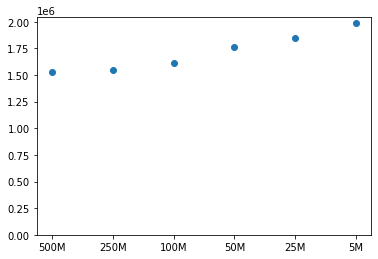

In [103]:
read_depth = ["500M", "250M", "100M", "50M", "25M", "5M"]
plt.scatter(read_depth,totals)
plt.ylim((0,max(totals)+0.5e5))

In [37]:
totals[-1]

1736815